In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pheno_train = pd.read_csv("train/pheno_training.csv")
readcounts_train = pd.read_csv("train/readcounts_training.csv")
taxtable_train = pd.read_csv("train/taxtable.csv")

pheno_test = pd.read_csv("test/pheno_test.csv")

pheno = pheno_train.append(pheno_test)

C:\Users\Tiago\AppData\Local\Temp\ipykernel_7108\655223777.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pheno = pheno_train.append(pheno_test)


## Exploração inicial
#### pheno_train

In [28]:
pheno_train.dtypes

Unnamed: 0            object
Age                  float64
BodyMassIndex        float64
Smoking              float64
BPTreatment            int64
PrevalentDiabetes    float64
PrevalentCHD         float64
PrevalentHFAIL       float64
Event                float64
Event_time           float64
SystolicBP           float64
NonHDLcholesterol    float64
Sex                    int64
dtype: object

In [29]:
pheno_train.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,3615.000000,3614.000000,3599.000000,3615.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3615.000000,3608.000000,3615.000000
mean,49.504423,27.071102,0.232842,0.155463,0.061728,0.032828,0.026094,0.084175,13.756255,136.341473,4.086256,0.443707
std,14.848086,4.724096,0.422701,0.362396,0.240695,0.178212,0.159438,0.277689,5.686619,22.037649,1.092486,0.496890
min,24.098000,15.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.709000,88.097000,1.558000,0.000000
25%,36.808500,23.774250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.740000,120.019500,3.336000,0.000000
50%,50.909000,26.402000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.820000,132.962000,3.990000,0.000000
75%,61.759000,29.499750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.881000,149.061500,4.721000,1.000000
max,74.242000,56.935000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,253.075000,12.988000,1.000000


In [30]:
pheno_train_female = pheno_train[pheno_train["Sex"] == 0]
pheno_train_female

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_328,53.618,24.127,0.0,0,0.0,0.0,0.0,0.0,15.750,133.077,3.020,0
1,Simulated_1644,36.811,27.992,0.0,0,0.0,0.0,0.0,0.0,15.881,108.914,5.480,0
3,Simulated_1732,48.842,26.804,0.0,0,0.0,0.0,0.0,0.0,15.918,128.059,5.119,0
6,Simulated_1681,60.941,34.778,0.0,0,0.0,0.0,0.0,1.0,16.000,135.097,2.631,0
8,Simulated_1603,62.498,27.583,0.0,0,0.0,0.0,0.0,0.0,15.882,110.934,2.460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,Simulated_1605,74.091,30.560,0.0,0,0.0,0.0,0.0,0.0,15.721,190.919,5.510,0
3608,Simulated_2202,74.129,27.480,0.0,1,0.0,0.0,0.0,1.0,3.978,177.961,4.342,0
3610,Simulated_1783,33.802,37.049,0.0,0,0.0,0.0,0.0,0.0,15.942,109.080,3.141,0
3613,Simulated_1592,70.278,31.945,0.0,1,0.0,0.0,0.0,0.0,15.609,142.038,2.492,0


In [31]:
pheno_train_nonaa = pheno_train.dropna()
pheno_train_nonaa.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,49.516436,27.075270,0.234746,0.155650,0.062147,0.033051,0.025989,0.084181,13.758238,136.372376,4.083206,0.443785
std,14.867448,4.724706,0.423900,0.362574,0.241456,0.178795,0.159124,0.277698,5.676572,22.066258,1.091306,0.496900
min,24.098000,15.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.709000,88.097000,1.558000,0.000000
25%,36.800750,23.782500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.740000,120.015500,3.328000,0.000000
50%,50.854500,26.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.820000,132.969500,3.989000,0.000000
75%,61.776250,29.498250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.881000,149.062500,4.721000,1.000000
max,74.242000,56.935000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,253.075000,12.988000,1.000000


Text(0, 0.5, 'Frequência')

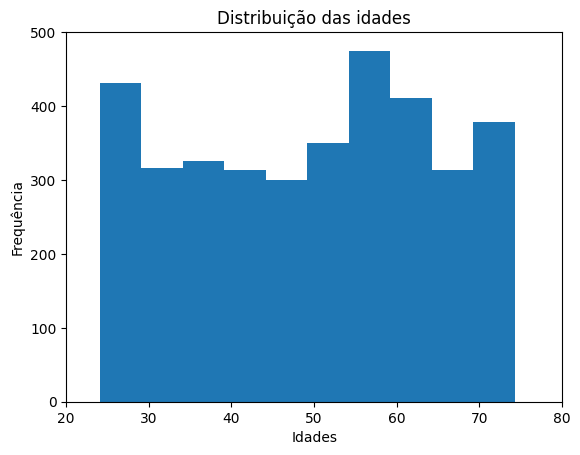

In [32]:
plt.hist(pheno_train["Age"])
plt.axis([20, 80, 0, 500])
plt.title("Distribuição das idades")
plt.xlabel("Idades")
plt.ylabel("Frequência")

Text(0, 0.5, 'Frequência')

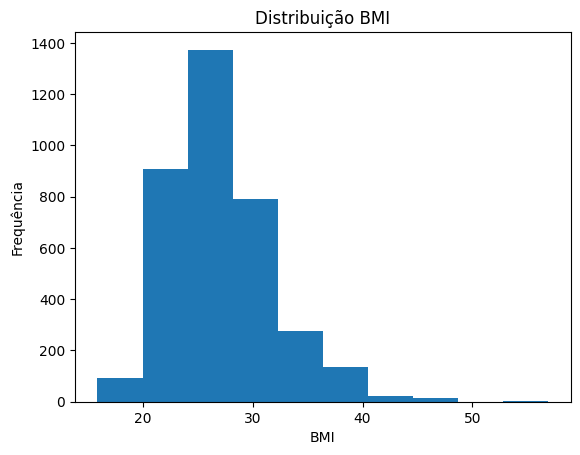

In [33]:
plt.hist(pheno_train["BodyMassIndex"])
plt.title("Distribuição BMI")
plt.xlabel("BMI")
plt.ylabel("Frequência")

In [34]:
perc_smoking = pd.Series.value_counts(pheno_train_nonaa["Smoking"] == 1) / pheno_train_nonaa.Smoking.size *100
perc_smoking


False    76.525424
True     23.474576
Name: Smoking, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

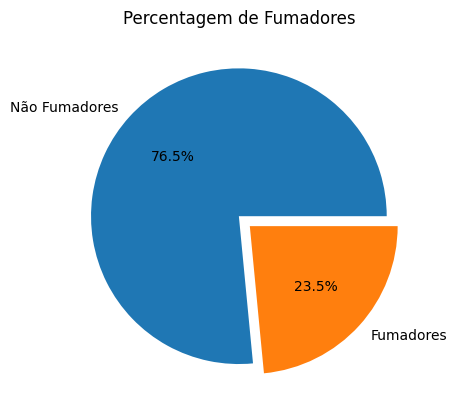

In [35]:
plt.pie(perc_smoking, labels= ["Não Fumadores", "Fumadores"], autopct= '%1.1f%%', explode= (0,0.1))
plt.title("Percentagem de Fumadores")
plt.show

<Figure size 1000x600 with 0 Axes>

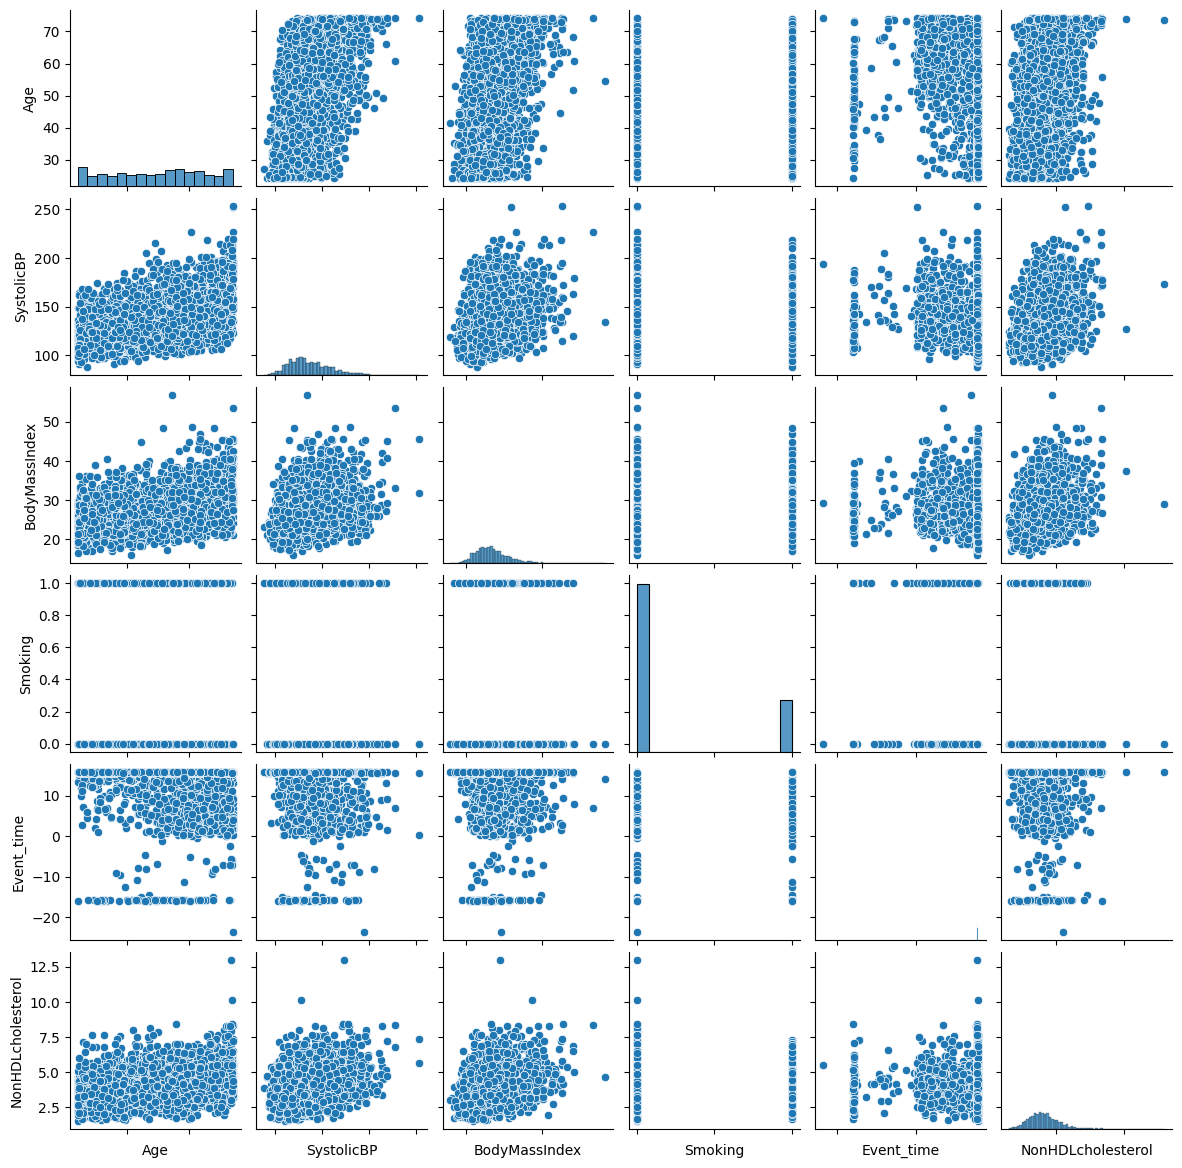

In [36]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(pheno_train_nonaa[['Age','SystolicBP','BodyMassIndex','Smoking','Event_time','NonHDLcholesterol']]
                 ,height=2)
g.set(xticklabels=[])

#### Exploração readcounts_train

In [37]:
readcounts_train.head

<bound method NDFrame.head of                                              Unnamed: 0  Simulated_328  \
0                    k__Archaea;p__;c__;o__;f__;g__;s__              0   
1     k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...              0   
2     k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...              0   
3     k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...              0   
4     k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...              0   
...                                                 ...            ...   
5743  k__Viruses;p__unclassified_bacterial_viruses;c...              0   
5744  k__Viruses;p__unclassified_viruses;c__Leptopil...              0   
5745  k__Viruses;p__unclassified_viruses;c__Mollivir...              0   
5746  k__Viruses;p__unclassified_viruses;c__Smacovir...              0   
5747  k__Viruses;p__unclassified_viruses;c__Torulasp...              0   

      Simulated_1644  Simulated_1710  Simulated_1732  Simulated_1727  \
0        

In [38]:
readcounts_train.dtypes

Unnamed: 0        object
Simulated_328      int64
Simulated_1644     int64
Simulated_1710     int64
Simulated_1732     int64
                   ...  
Simulated_1783     int64
Simulated_3425     int64
Simulated_1789     int64
Simulated_1592     int64
Simulated_1731     int64
Length: 3616, dtype: object

In [39]:
readcounts_train.describe()

,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,Simulated_1601,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,...,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,187.729819,201.291232,129.467989,273.373695,116.749130,132.382220,55.174843,87.517223,468.192241,134.719555,...,252.920320,132.893528,175.411447,99.843598,223.180237,397.058107,108.615518,50.392484,57.360473,294.581072
std,4045.491449,7845.598753,4853.530742,5765.579549,1893.994589,1971.111151,1275.434827,1724.518096,9934.202419,1786.720767,...,3938.186685,1983.863116,2897.488989,1834.970422,8178.721692,7679.973955,1542.724800,1129.104995,1121.717643,5056.226468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,276290.000000,469820.000000,359562.000000,279370.000000,98275.000000,79766.000000,73865.000000,77094.000000,569000.000000,64523.000000,...,141863.000000,84802.000000,93681.000000,98023.000000,602477.000000,398096.000000,72741.000000,73522.000000,62928.000000,245420.000000


In [40]:
readcounts_train["Unnamed: 0"]

0                      k__Archaea;p__;c__;o__;f__;g__;s__
1       k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...
2       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
3       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
4       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
                              ...                        
5743    k__Viruses;p__unclassified_bacterial_viruses;c...
5744    k__Viruses;p__unclassified_viruses;c__Leptopil...
5745    k__Viruses;p__unclassified_viruses;c__Mollivir...
5746    k__Viruses;p__unclassified_viruses;c__Smacovir...
5747    k__Viruses;p__unclassified_viruses;c__Torulasp...
Name: Unnamed: 0, Length: 5748, dtype: object

In [41]:
readcounts_train.isna().sum().sum()

0

In [42]:

readcounts_train_trans = readcounts_train.iloc[:, 1:].T
readcounts_train_trans.columns = list(readcounts_train["Unnamed: 0"])
readcounts_train_trans

,k__Archaea;p__;c__;o__;f__;g__;s__,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Acidilobaceae;g__Acidilobus;s__Acidilobus_saccharovorans,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Caldisphaeraceae;g__Caldisphaera;s__Caldisphaera_lagunensis,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;s__Aeropyrum_camini,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_amylolyticus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_mucosus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Ignicoccus;s__Ignicoccus_hospitalis,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
Simulated_328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1644,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1732,0,0,0,0,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,0
Simulated_1727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exploração taxtable_train

In [43]:
taxtable_train

,Domain,Phylum,Class,Order,Family,Genus,Species
0,k__Archaea,p__,c__,o__,f__,g__,s__
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__
3,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Acidilobaceae,g__Acidilobus,s__Acidilobus_saccharovorans
4,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Caldisphaeraceae,g__Caldisphaera,s__Caldisphaera_lagunensis
...,...,...,...,...,...,...,...
5743,k__Viruses,p__unclassified_bacterial_viruses,c__Synechococcus_phage_S-CAM3,o__,f__,g__,s__
5744,k__Viruses,p__unclassified_viruses,c__Leptopilina_boulardi_filamentous_virus,o__,f__,g__,s__
5745,k__Viruses,p__unclassified_viruses,c__Mollivirus_sibericum,o__,f__,g__,s__
5746,k__Viruses,p__unclassified_viruses,c__Smacovirusgroup,o__,f__,g__,s__


In [44]:
taxtable_train_nonan = taxtable_train.dropna()
taxtable_train_nonan.describe()

,Domain,Phylum,Class,Order,Family,Genus,Species
count,5713,5713,5713,5713,5713,5713,5713
unique,5,50,130,171,364,1471,4535
top,k__Bacteria,p__Proteobacteria,c__Actinobacteria,o__Bacillales,f__Flavobacteriaceae,g__,s__
freq,5024,2215,916,391,196,321,845


In [45]:
taxtable_train.dtypes

Domain     object
Phylum     object
Class      object
Order      object
Family     object
Genus      object
Species    object
dtype: object